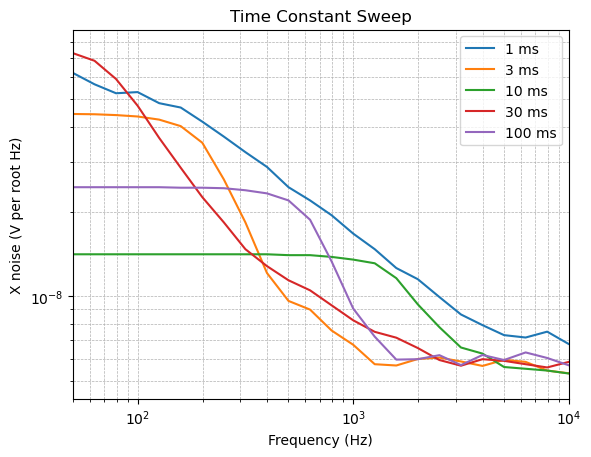

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get a list of all CSV files in the current directory
csv_files = [file for file in os.listdir('.') if file.endswith(".csv")] 

labels = ['1 ms','3 ms','10 ms','30 ms','100 ms']
i = 0
# Loop through each CSV file and plot the data
for file in csv_files:
    # Directly use the file name
    df = pd.read_csv(file)

    x_values = df['Frequency (Hz) - Plot 0']
    y_values = df['X noise (V per root Hz) - Plot 0']

    plt.loglog(x_values, y_values, label=labels[i])
    i += 1

plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Time Constant Sweep')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

plt.xlim(50, 10000)
plt.show()